In [263]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Interpretarea coeficientilor regresiei

In [264]:
diamond = pd.read_csv('diamond.csv')
diamond.head()

,Unnamed: 0,carat,price
0,1,0.17,355
1,2,0.16,328
2,3,0.17,350
3,4,0.18,325
4,5,0.25,642


intercept: -259.62590719155486 coefficient: 3721.024851550472


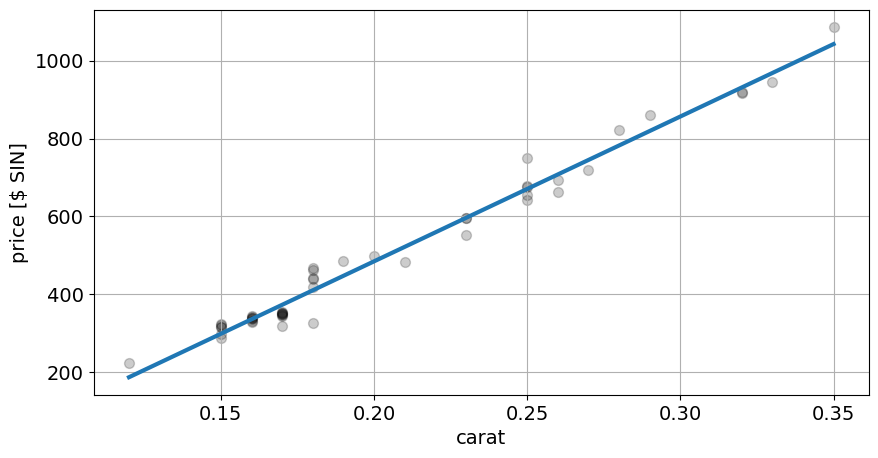

In [265]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [266]:
lm.scale

1013.8188581099834

mean(X): 0.2041666666666667
intercept: 500.0833333333336 coefficient: 3721.024851550472


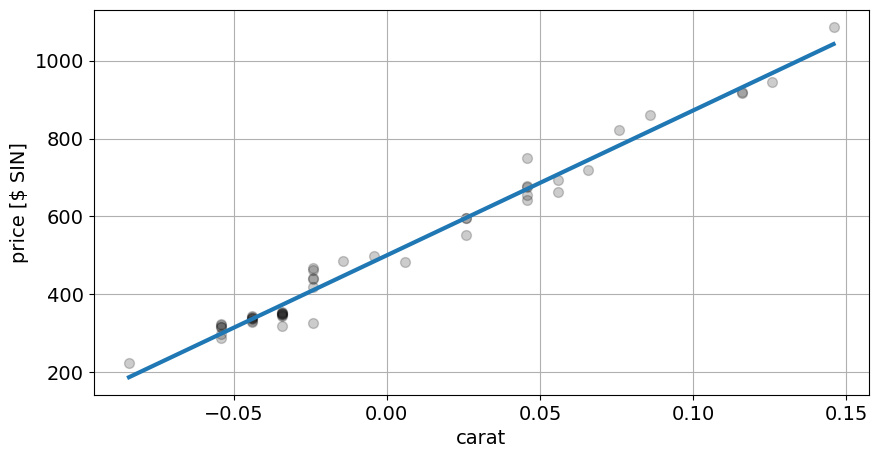

In [267]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

print('mean(X):', np.mean(x))
x -= np.mean(x)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

# Residuals

intercept: -259.62590719155486 coefficient: 3721.024851550472


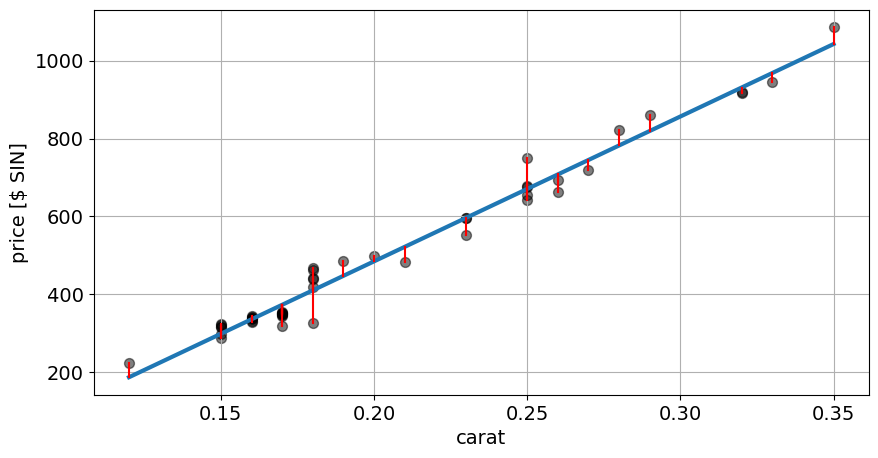

In [268]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [269]:
np.sum(y - yf)

1.0743406164692715e-11

In [270]:
# acestea sunt residuals, fie le luam din model, fie calculate
print(lm.resid), print(y - yf)

[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.84143391 -26.94831757  16.47217946
 -22.94831757 -13.1020453  -12.1020453   -0.52782054   3.26193094
   2.26193094  -1.20980867 -43.20980867 -27.94831757 -23.31229382
 -15.6303057   43.26720915  32.84143391   7.3696943    4.3696943
 -11.52782054 -14.84055421  17.47217946]
[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.8414339

(None, None)

In [271]:
# tehnic, suma reziduurilor este zero
np.sum(lm.resid), np.sum(lm.resid * x)

(1.0743406164692715e-11, 2.3447910280083306e-12)

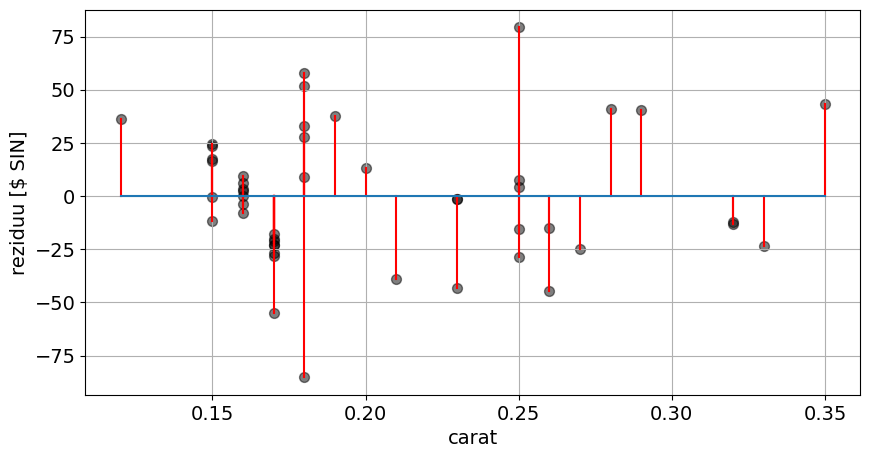

In [272]:
# scatter plot pentru residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="carat", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

In [273]:
print(np.sqrt(np.sum(lm.resid**2)/(len(lm.resid) - 2)))

31.840522265031762


intercept: 1.0090527529274915 coefficient: 1.3254234191524772


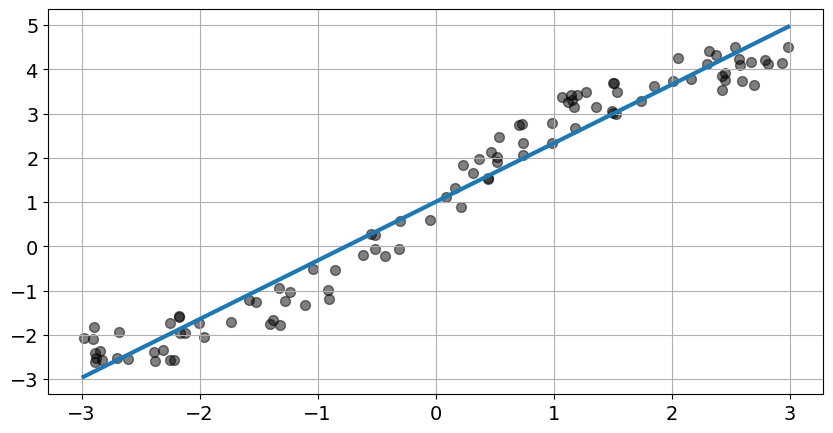

In [274]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6 - 3
y = x + np.sin(x) + np.random.rand(100) + np.sqrt(0.2)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

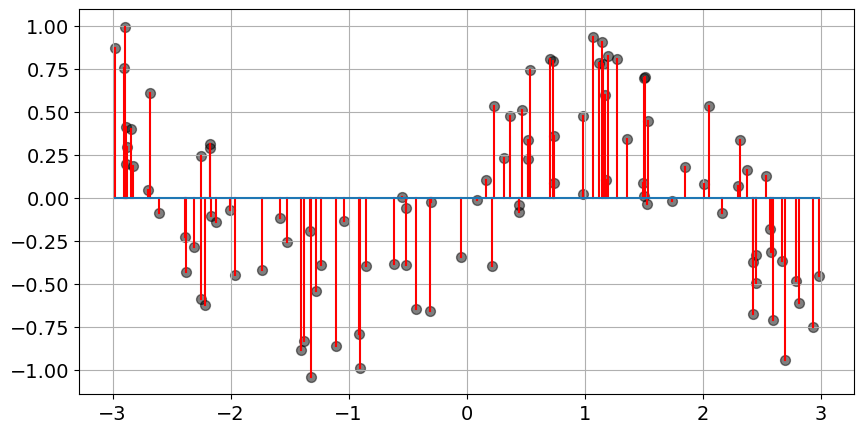

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

intercept: 4.27944579027284e-05 coefficient: 0.9999887710111148


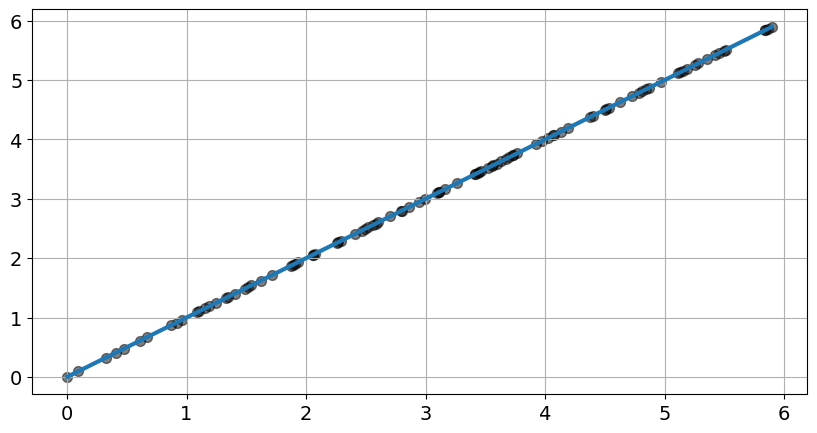

In [276]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6
y = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

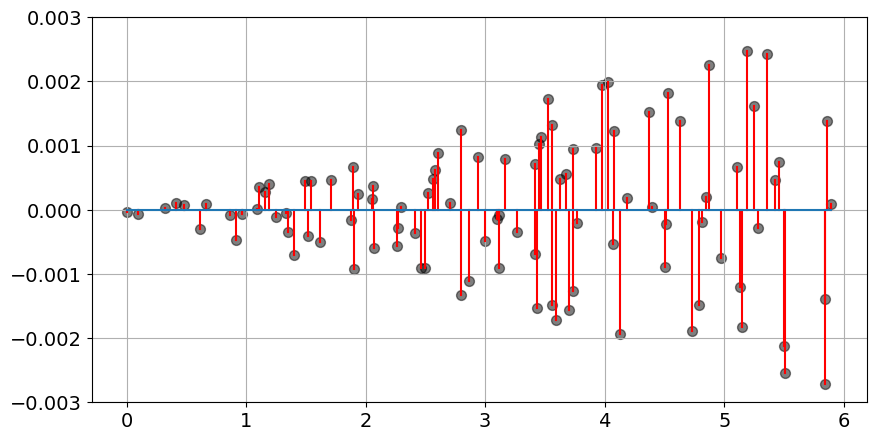

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set_ylim(-0.003, 0.003)
ax.grid(True)
plt.show()

# Constructia statisticilor pentru coeficientii regresiei

In [278]:
# vezi documentatia, http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

stat_beta0, stat_beta1 = beta0 / se_beta0, beta1 / se_beta1
p_beta0 = 2 * stats.t.sf(np.abs(stat_beta0), df=n-2)
p_beta1 = 2 * stats.t.sf(np.abs(stat_beta1), df=n-2)
i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

intercept: -259.62590719155486 coefficient: 3721.024851550472
sigma: 31.840522265031762


In [279]:
df1 = pd.DataFrame([['beta0', beta0, se_beta0, stat_beta0, p_beta0, i_beta0[0], i_beta0[1]],
                   ['beta1', beta1, se_beta1, stat_beta1, p_beta1, i_beta1[0], i_beta1[1]]],
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
df2 = pd.DataFrame([['beta0', lm.params[0], lm.bse[0], lm.tvalues[0], lm.pvalues[0], lm.conf_int()[0][0], 
                     lm.conf_int()[0][1]],
                    ['beta1', lm.params[1], lm.bse[1], lm.tvalues[1], lm.pvalues[1], lm.conf_int()[1][0], 
                     lm.conf_int()[1][1]]],                  
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
print(df1)
print(df2)

  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  
  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  


In [280]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Sat, 20 May 2023   Prob (F-statistic):           6.75e-40
Time:                        20:29:13   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.0

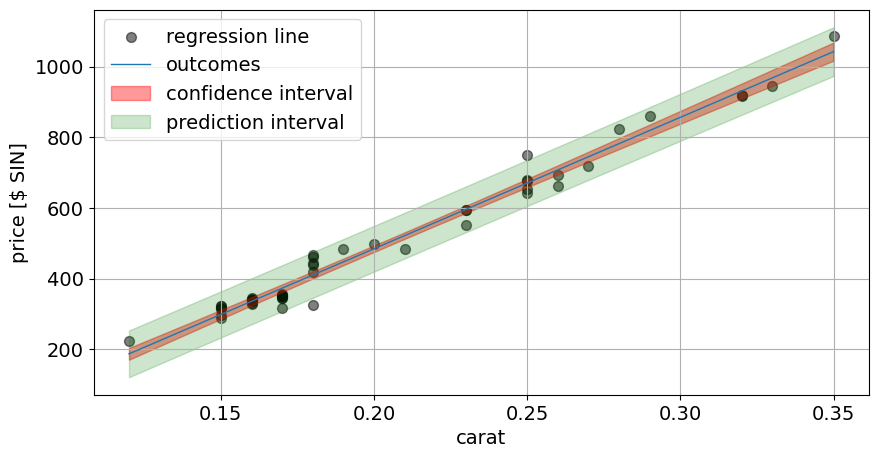

In [281]:
def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

In [282]:
sigma

31.840522265031762

In [283]:
np.std(lm.resid)

31.170120399009274

In [284]:
lm.rsquared

0.978260777986033

In [285]:
x, y, f(x)

(array([0.17, 0.16, 0.17, 0.18, 0.25, 0.16, 0.15, 0.19, 0.21, 0.15, 0.18,
        0.28, 0.16, 0.2 , 0.23, 0.29, 0.12, 0.26, 0.25, 0.27, 0.18, 0.16,
        0.17, 0.16, 0.17, 0.18, 0.17, 0.18, 0.17, 0.15, 0.17, 0.32, 0.32,
        0.15, 0.16, 0.16, 0.23, 0.23, 0.17, 0.33, 0.25, 0.35, 0.18, 0.25,
        0.25, 0.15, 0.26, 0.15]),
 array([ 355,  328,  350,  325,  642,  342,  322,  485,  483,  323,  462,
         823,  336,  498,  595,  860,  223,  663,  750,  720,  468,  345,
         352,  332,  353,  438,  318,  419,  346,  315,  350,  918,  919,
         298,  339,  338,  595,  553,  345,  945,  655, 1086,  443,  678,
         675,  287,  693,  316], dtype=int64),
 array([ 372.94831757,  335.73806906,  372.94831757,  410.15856609,
         670.6303057 ,  335.73806906,  298.52782054,  447.3688146 ,
         521.78931163,  298.52782054,  410.15856609,  782.26105124,
         335.73806906,  484.57906312,  596.20980867,  819.47129976,
         186.89707499,  707.84055421,  670.6303057 ,  7

In [286]:
np.sum((f(x)- np.mean(y))**2) / np.sum((y - np.mean(y))**2)

0.9782607779860324

# Laborator

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

In [287]:
# a)
father_son = pd.read_csv('father_son.csv')
x = father_son['fheight'].values
y = father_son['sheight'].values

#adaugam coloana pentru a calcula interceptul
xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

results = lm.summary()
print(results)

# bazat pe p putem sa spunem ca exista relatie liniara 
# seminificativa intre inaltimea tatlui si a fiului 

# o crestere a lui x se asociaza cu o crestere de 0.5141 a lui y
# (creste inaltimea tatalui, creste si inaltimea fiului)

intercept: 33.88660435407803 coefficient: 0.5140930386233065
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.12e-69
Time:                        20:29:14   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [288]:
# b)
# pentru centrare ne amintim ca acesta poate fi realiazta prin 
# scaderea mediei de la fiecare valoare din setul de date
X_centered = x - x.mean() # centrare variabila predictorin zero
X_centered = sm.add_constant(X_centered) #adaugam constanta pentru a calcula intercept-ul
model = sm.OLS(y, X_centered).fit() #modelul de regresie liniara pentru predictorul centrat 

beta0, beta1 = model.params[0], model.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

results = model.summary()
print(results)
# are aceiasi interpretare ca la a)

intercept: 68.6840696567718 coefficient: 0.5140930386233085
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.12e-69
Time:                        20:29:14   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

In [289]:
x = father_son['fheight'].values
y = father_son['sheight'].values

#adaugam coloana pentru a calcula interceptul
xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()

father_height = 80
# prezicem inaltimea fiului
predicted_height = lm.predict([1, father_height])
print("Inaltimea fiului prezisa pentru un tata cu inaltimea 80:", predicted_height)

Inaltimea fiului prezisa pentru un tata cu inaltimea 80: [75.01404744]


In [290]:
# o sa folosim metoda get_prediction pentru a obtine un interval
# de confidenta de 95%
# si apoi extragem intervalul
interval_prediction = lm.get_prediction([1,father_height]).conf_int(alpha=0.05)
print("Intervalul de confidenta asociat predictiei:", interval_prediction)

Intervalul de confidenta asociat predictiei: [[74.34452279 75.6835721 ]]


__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

In [291]:
# a)
mtcars = pd.read_csv('mtcars.csv')

X = mtcars[['hp']] #predictor
y = mtcars['mpg'] #raspuns

# centram X
X_centered = X - X.mean()

# adaugam coloana de constanta
X_centered = sm.add_constant(X_centered)

model = sm.OLS(y, X_centered).fit() # regresia liniară
results = model.summary()
print(results)
# observand coeficientul care este cu mins (respectiv -0.0682) acesta
# ne arata ca, in medie, pentru fiecare unitate in plus de putere
# a motorului se estimeaza o scadere de consum de combustibil 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.79e-07
Time:                        20:29:14   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0906      0.683     29.420      0.0

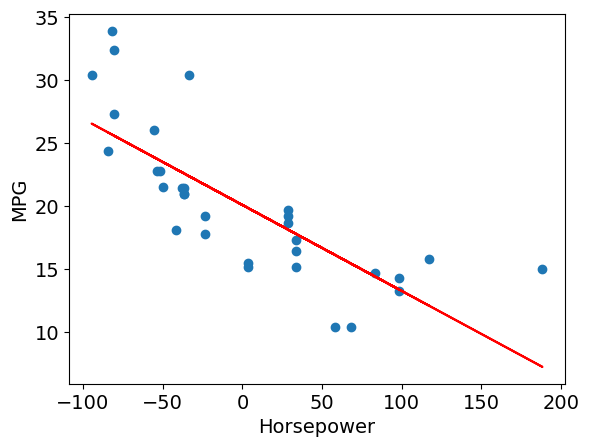

In [292]:
# b)
plt.scatter(X_centered['hp'], y)
plt.plot(X_centered['hp'], model.predict(X_centered), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [293]:
# c)
# Bazat pe analiza summary-ului putem sa spunem ca exista o corelarie 
# liniara intre puterea motorului si consumul de conbustibil

# Vedem ca si R-squared este 0.602; de asta putem sa zicem ca 
# 60.2% din variata consumuli de combustibil poate fi explicat de
# variatia puterii motorului 

# Pentru variabila hp, valoarea t este -6.742, iar valoarea lui p este 0
# deci coeficientul este semnificativ diferit de 0 


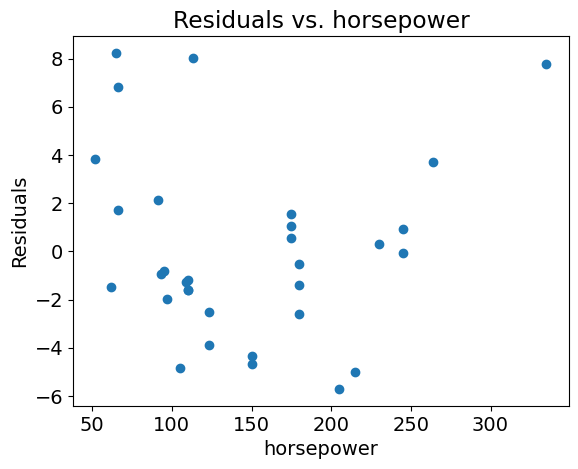

In [294]:
# d)
# pentru a obtine rezidurile
residuals = model.resid

plt.scatter(mtcars['hp'], residuals)
plt.xlabel('horsepower')
plt.ylabel('Residuals')
plt.title('Residuals vs. horsepower')
plt.show()

In [295]:
# estimarea dispersiei in mod direct 
residual_var = np.var(residuals)

# estimarea rezidurilor folosind modelul calculat
model_residual_var = model.scale

print("Dispersia reziduurilor direct: ", residual_var)
print("Dispersia reziduurilor folosind modelul calculat: ", model_residual_var)

Dispersia reziduurilor direct:  13.989822298268804
Dispersia reziduurilor folosind modelul calculat:  14.92247711815339


In [296]:
# e)
# obtinem si afisam r-squared
r_squared = model.rsquared
print("R-squared:", r_squared)
# Vedem ca si R-squared este 0.602; de asta putem sa zicem ca 
# 60.2% din variata consumuli de combustibil poate fi explicat de
# variatia puterii motorului 

R-squared: 0.6024373414239341


__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

In [297]:
# a)
father_son = pd.read_csv('father_son.csv')
x = father_son['fheight'].values
y = father_son['sheight'].values

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()

beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

# folosim conf int de 0.05 pentru a putea obtine intervalul de confidenta
# 95 pentru fiecare dintre acesti parametri
intercept_interval = lm.conf_int(alpha=0.05)[0]
# panta
slope_interval = lm.conf_int(alpha=0.05)[1]

print("Interval de confidenta pentru intercept:", intercept_interval)
print("Interval de confidenta pentru slope:", slope_interval)

intercept: 33.88660435407803 coefficient: 0.5140930386233065
Interval de confidenta pentru intercept: [30.29121257 37.48199614]
Interval de confidenta pentru slope: [0.46101879 0.56716729]


In [298]:
# b)
# Pentru a calcula intervalul de confidenta utilizam get_prediction
mean_fheight = np.mean(x)
predicted = lm.get_prediction([1, mean_fheight])
interval = predicted.conf_int(alpha=0.05)

print("Intervalul de confidenta:", interval)

Intervalul de confidenta: [[68.53845541 68.8296839 ]]


In [299]:
# c)
# intervalul de prediectie va fi mai larg, luam in calcul si variabilitatea
# erorilor de predictie
# avem intervalul bazat pe observatii reale
pred_interval = predicted.conf_int(alpha=0.05, obs=True)

print("Intervalul de predicție:", pred_interval)

Intervalul de predicție: [[63.90091322 73.4672261 ]]


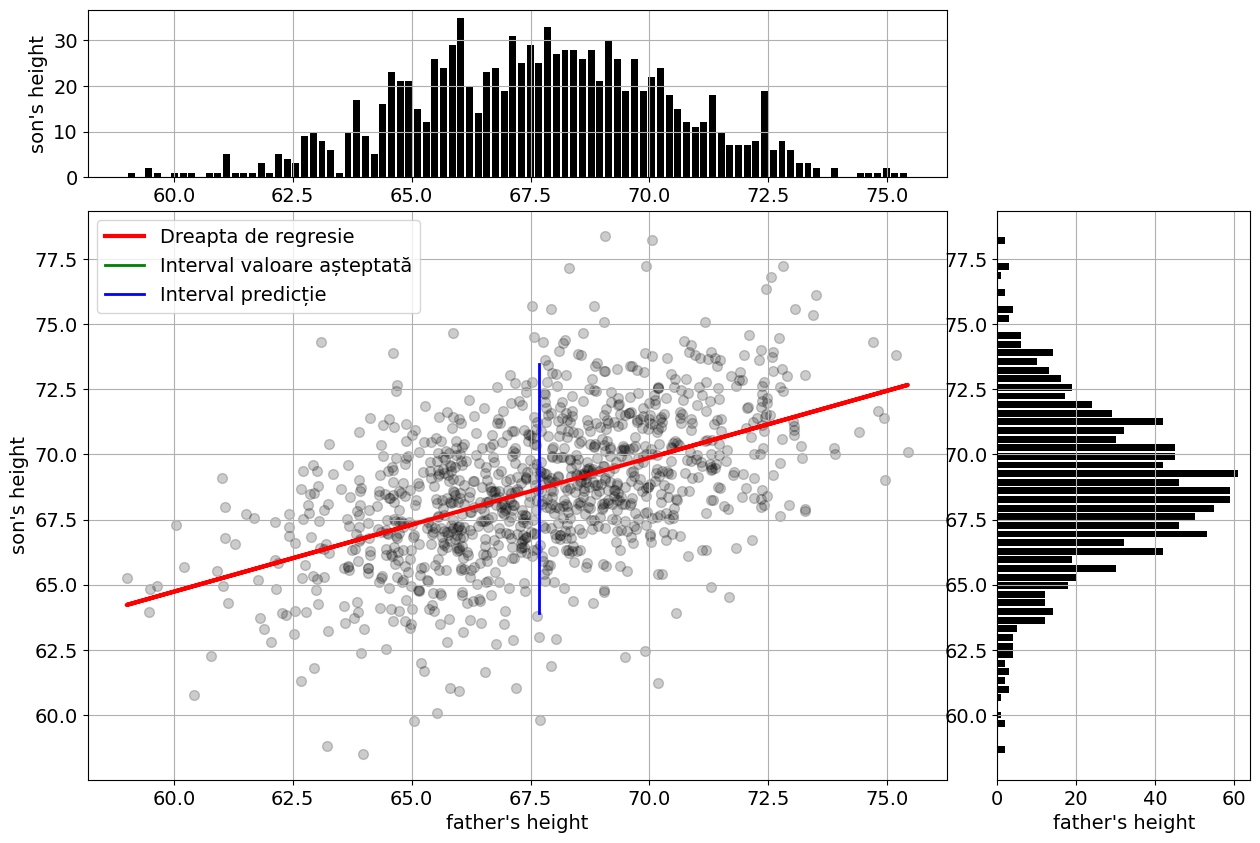

In [300]:
# # d)
import matplotlib.gridspec as gridspec
# Copiat si modificat codul de la tema 7

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3], sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3], sharey=ax_main)

ax_main.scatter(x, y, c='k', alpha=0.2, s=50)
ax_main.plot(x, beta0 + beta1 * x, color='r', label='Dreapta de regresie', linewidth=3)

ax_main.plot([mean_fheight, mean_fheight], [interval[0][0], interval[0][1]], color='green', label='Interval valoare așteptată', linewidth=2)
ax_main.plot([mean_fheight, mean_fheight], [pred_interval[0][0], pred_interval[0][1]], color='blue', label='Interval predicție', linewidth=2)

ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.legend()
ax_main.grid(True)

ax_fDist.hist(x, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(y, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()


__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

In [301]:
# a)
mtcars = pd.read_csv('mtcars.csv')
X = mtcars['hp'].values
y = mtcars['mpg'].values

Xext = sm.add_constant(X)
lm = sm.OLS(y, Xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

intercept_interval = lm.conf_int(alpha=0.05)[0]
slope_interval = lm.conf_int(alpha=0.05)[1]

print("Interval de confidenta pentru intercept:", intercept_interval)
print("Interval de confidenta pentru slope:", slope_interval)


intercept: 30.098860539622514 coefficient: -0.06822827807156367
Interval de confidenta pentru intercept: [26.76194879 33.43577229]
Interval de confidenta pentru slope: [-0.08889465 -0.0475619 ]


In [302]:
# b)
mean = np.mean(X)
predicted = lm.get_prediction([1, mean])
interval = predicted.conf_int(alpha=0.05)

print("Intervalul de confidenta:", interval)

Intervalul de confidenta: [[18.69599452 21.48525548]]


In [303]:
# c)
pred_interval = predicted.conf_int(alpha=0.05, obs=True)

print("Intervalul de predicție:", pred_interval)

Intervalul de predicție: [[12.07908285 28.10216715]]


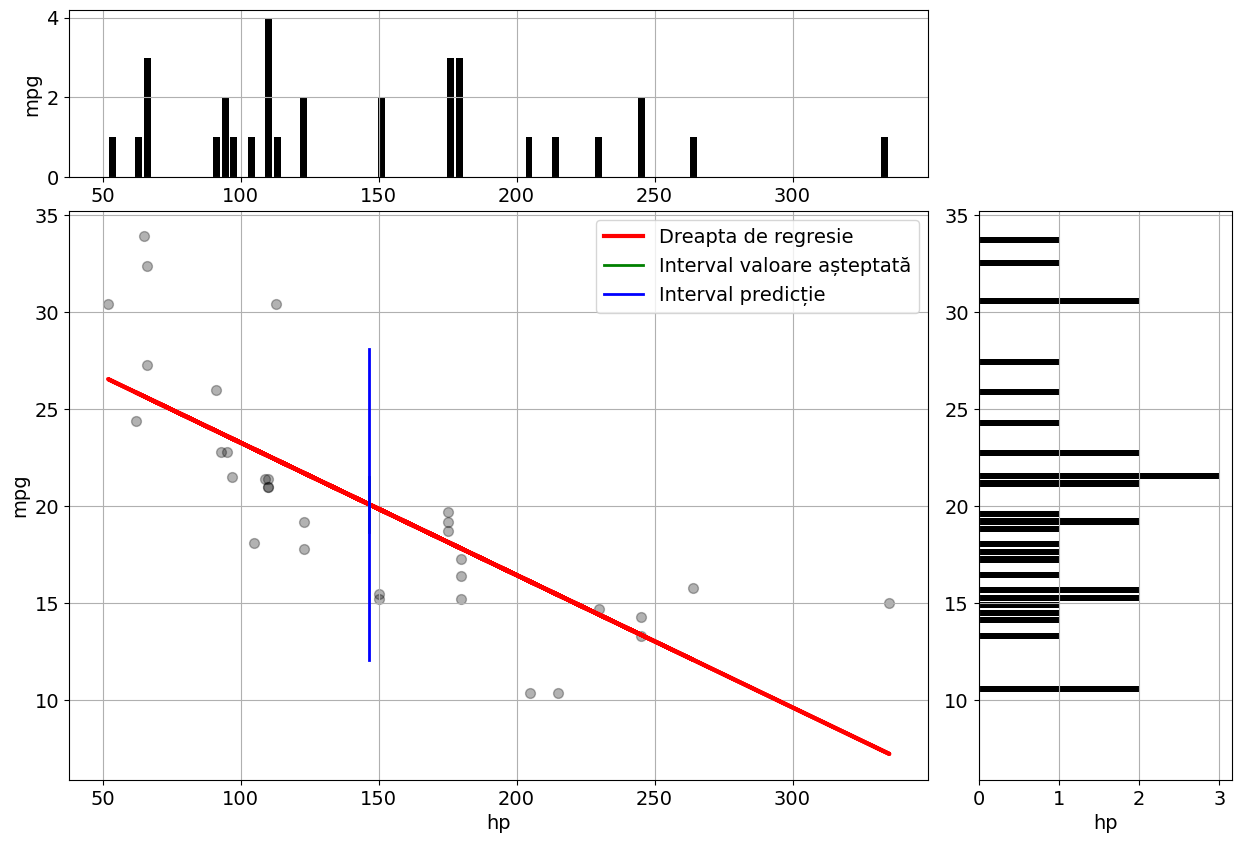

In [304]:
# d)
import matplotlib.gridspec as gridspec
# Copiat si modificat codul de la tema 7

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3], sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3], sharey=ax_main)

ax_main.scatter(X, y, c='k', alpha=.3, s=50)
ax_main.plot(X, beta0 + beta1 * X, color='r', label='Dreapta de regresie', linewidth=3)
ax_main.plot([mean, mean], [interval[0][0], interval[0][1]], color='green', label='Interval valoare așteptată', linewidth=2)
ax_main.plot([mean, mean], [pred_interval[0][0], pred_interval[0][1]], color='blue', label='Interval predicție', linewidth=2)

ax_main.set(xlabel="hp", ylabel="mpg")
ax_main.legend()
ax_main.grid(True)

ax_fDist.hist(X, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="mpg")
ax_fDist.grid(True)

ax_sDist.hist(y, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="hp")
ax_sDist.grid(True)

plt.show()

__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?

In [305]:
np.random.seed(1)
x = np.arange(1, 11)
y_simplu = 2 * x + np.random.normal(0, 1, size=10)
y_hetero = (2 * x + np.random.normal(0, x, size=10))

print("x: ", x)
print("y normal:", y_simplu)
print("y cu variatie reziduala:", y_hetero)

x:  [ 1  2  3  4  5  6  7  8  9 10]
y normal: [ 3.62434536  3.38824359  5.47182825  6.92703138 10.86540763  9.6984613
 15.74481176 15.2387931  18.3190391  19.75062962]
y cu variatie reziduala: [ 3.46210794 -0.12028142  5.03274839  6.46378258 15.66884721  5.4006524
 12.79300255  8.97713266 18.37992372 25.82815214]


In [306]:
# a)
# Dreapta regresie
xext = sm.add_constant(x)
model_simplu = sm.OLS(y_simplu, xext).fit()

# Coeficientii dreptei
beta0_simplu, beta1_simplu = model_simplu.params[0], model_simplu.params[1]

beta0_simplu, beta1_simplu = lm.params[0], lm.params[1]
print('intercept simplu:', beta0_simplu, '\ncoefficient simplu:', beta1_simplu)

results_simplu = model_simplu.summary()
print(results_simplu)



intercept simplu: 30.098860539622514 
coefficient simplu: -0.06822827807156367
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 20 May 2023   Prob (F-statistic):           8.99e-07
Time:                        20:29:19   Log-Likelihood:                -15.895
No. Observations:                  10   AIC:                             35.79
Df Residuals:                       8   BIC:                             36.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

c:\Users\Magda\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [307]:
# Dreapta regresie
model_hetero= sm.OLS(y_hetero, xext).fit()

# Coeficientii dreptei
beta0_hetero, beta1_reziduri = model_hetero.params[0], model_hetero.params[1]

beta0_hetero, beta1_hetero = lm.params[0], lm.params[1]
print('intercept:', beta0_hetero, '\ncoefficient:', beta1_hetero)

results_hetero = model_hetero.summary()
print(results_hetero)


intercept: 30.098860539622514 
coefficient: -0.06822827807156367
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sat, 20 May 2023   Prob (F-statistic):            0.00283
Time:                        20:29:19   Log-Likelihood:                -28.466
No. Observations:                  10   AIC:                             60.93
Df Residuals:                       8   BIC:                             61.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

c:\Users\Magda\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Diagrama rezidurilor (heteroscedastic)')

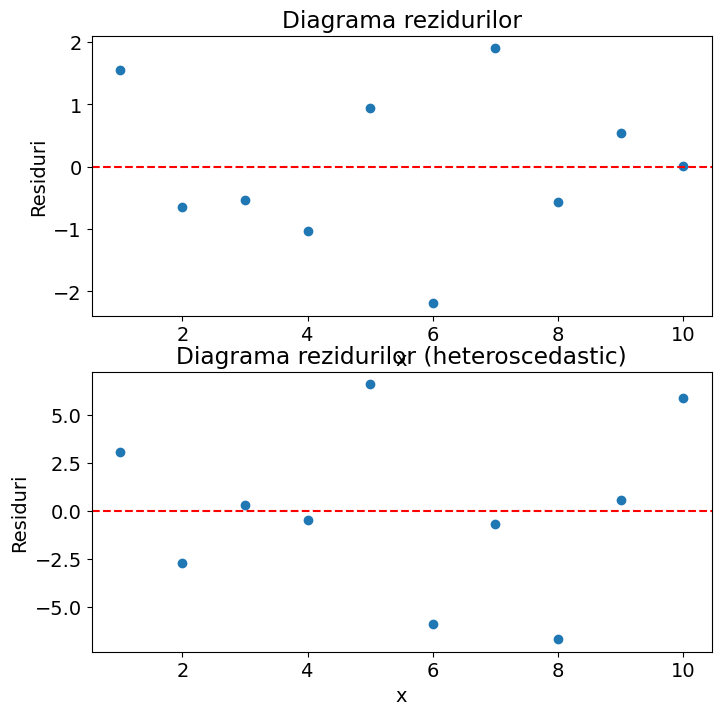

In [308]:
# b)
residuals_simplu = model_simplu.resid
residuals_hetero = model_hetero.resid

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].scatter(x, residuals_simplu)
ax[0].axhline(0, color='r', linestyle='--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Residuri')
ax[0].set_title('Diagrama rezidurilor')

ax[1].scatter(x, residuals_hetero)
ax[1].axhline(0, color='r', linestyle='--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Residuri')
ax[1].set_title('Diagrama rezidurilor (heteroscedastic)')

In [309]:
# c)
R2_simplu = model_simplu.rsquared
R2_hetero = model_hetero.rsquared

print("R-squared (omoscedastic):", R2_simplu)
print("R-squared (heteroscedastic):", R2_hetero)

R-squared (omoscedastic): 0.9576012304098496
R-squared (heteroscedastic): 0.6923004206907324


In [310]:
# d)
interval_simplu = model_simplu.conf_int(alpha=0.05)
interval_hetero = model_hetero.conf_int(alpha=0.05)

print("Interval de confidență (omoscedastic):\n", interval_simplu)
print("Interval de confidență (heteroscedastic):\n", interval_hetero)

Interval de confidență (omoscedastic):
 [[-1.97833777  2.19916625]
 [ 1.62562984  2.29889557]]
Interval de confidență (heteroscedastic):
 [[-9.12872137  5.55678699]
 [ 0.99380329  3.36058726]]


In [311]:
# Diagrama rezidurilor pentru dataset ul fara variatie reziduala 
# arata o distributie aproape aleatoare a elementelor in jurul 
# linie rosii, pe cand diagrama pentru dataset ul cu variatie reziduala 
# prezinta o dispersie mai mare a rezidurilor la valori mai mari ale lui x